# About Dataset
Mobile price depends on various factors such as resolution, brand, size, weight, imaging quality, RAM, battery and cpu power. In this dataset, we want to estimate the price of mobile phones using the above features.

# Problem Statement 
The objective is to develop a predictive model that accurately estimates the price of mobile phones based on a variety of features including resolution, brand, size, weight, imaging quality, RAM, battery capacity, and CPU power. By leveraging machine learning techniques(Linear Regression), the goal is to create a  pricing model that assists consumers, manufacturers, and retailers in making informed decisions regarding mobile phone pricing strategies, product positioning, and purchasing choices.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/kaggle/input/mobile-price-prediction/Cellphone.csv")

In [3]:
df.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


# Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [5]:
df.isna().sum()
# there are no null values 

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

In [6]:
df.duplicated().sum()
# there are no duplicated values

0

In [7]:
df.describe()
# AVG price - 2215
# AVG Weight - 170 grms

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


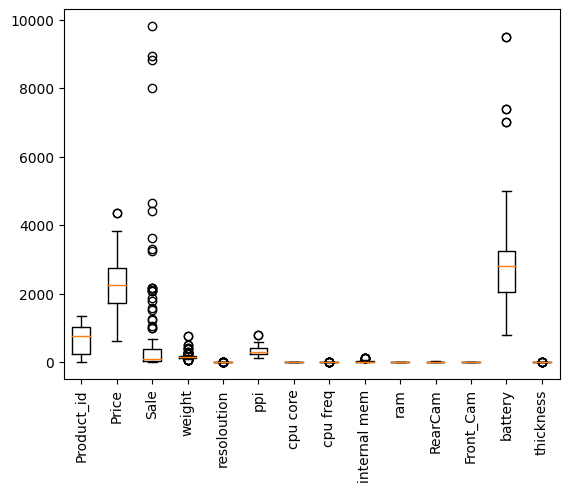

In [8]:
plt.boxplot(df,labels=df.columns)
plt.xticks(rotation=90)
plt.show()

# Removing Outliers

In [9]:
q1 = df['weight'].quantile(0.25)
q3 = df['weight'].quantile(0.75)

iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

outlier = (df['weight'] < lower_bound) | (df['weight'] > upper_bound)
df = df[~outlier]

In [10]:
df.drop(columns=['Product_id','Sale'],inplace=True)

In [11]:
df.shape

(137, 12)

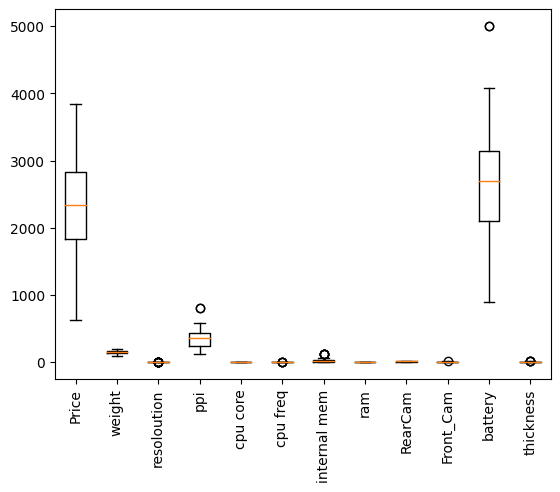

In [12]:
plt.boxplot(df,labels=df.columns)
plt.xticks(rotation=90)
plt.show()

# EDA

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137 entries, 0 to 160
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         137 non-null    int64  
 1   weight        137 non-null    float64
 2   resoloution   137 non-null    float64
 3   ppi           137 non-null    int64  
 4   cpu core      137 non-null    int64  
 5   cpu freq      137 non-null    float64
 6   internal mem  137 non-null    float64
 7   ram           137 non-null    float64
 8   RearCam       137 non-null    float64
 9   Front_Cam     137 non-null    float64
 10  battery       137 non-null    int64  
 11  thickness     137 non-null    float64
dtypes: float64(8), int64(4)
memory usage: 13.9 KB


In [14]:
df.head()

,Price,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,2357,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,1749,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,1916,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,1315,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,1749,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


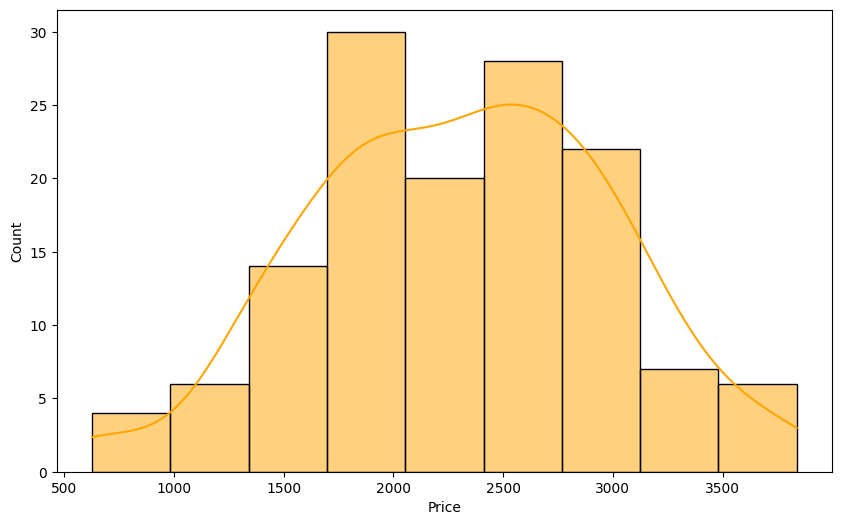

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(df['Price'],kde=True,color='orange')
plt.show()
# Price column is normally distributed

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


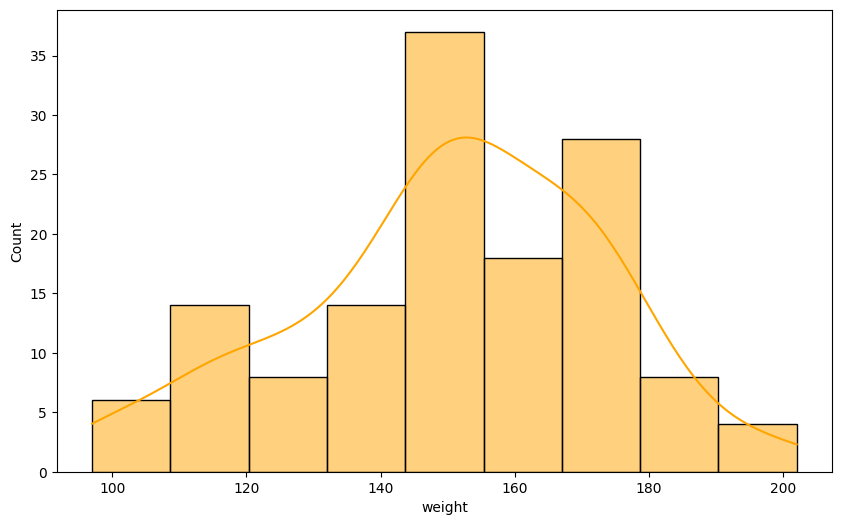

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(df['weight'],kde=True,color='orange')
plt.show()
# The weight column seems to be normally distributed in the dataset

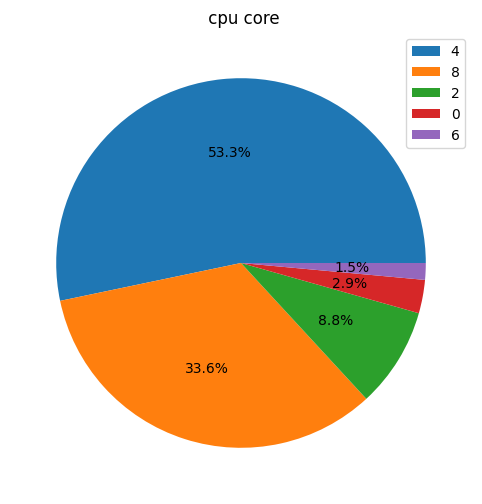

In [17]:
plt.figure(figsize=(10,6))
plt.pie(df['cpu core'].value_counts(),autopct = ("%1.1f%%"))
plt.title(" cpu core")
plt.legend(df['cpu core'].value_counts().index)
plt.show()
# Most of the smartphones have 4 CPU cores followed by 8 and 2 respectively 

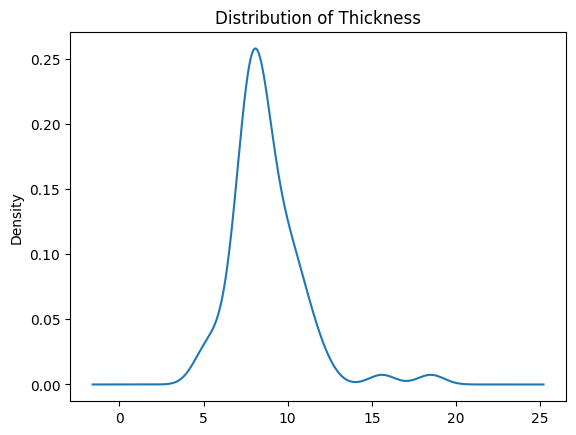

In [18]:
df['thickness'].plot(kind= 'kde')
plt.title("Distribution of Thickness")
plt.show()
# Most common density is around 9mm

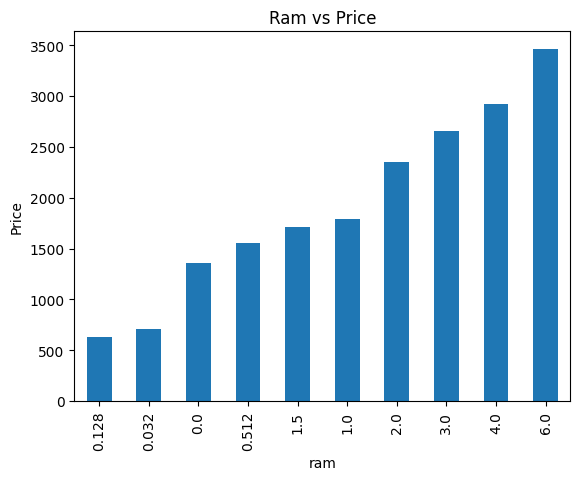

In [19]:
df.groupby('ram').Price.mean().sort_values().head(20).plot(kind = 'bar')
plt.ylabel("Price")
plt.title("Ram vs Price")
plt.show() 
# it shows that when ram increases then the price also increases

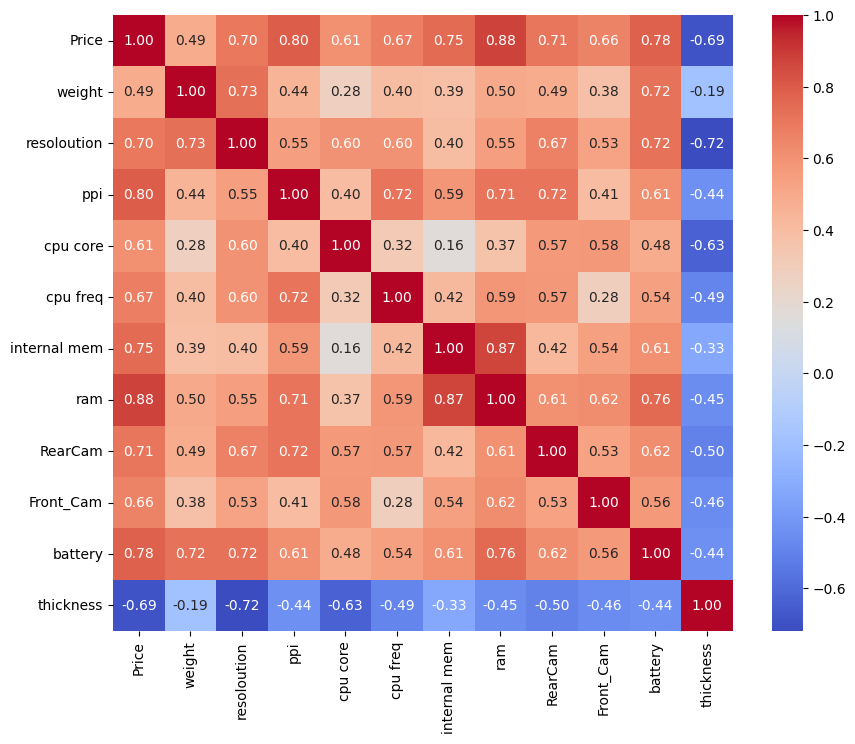

In [20]:
# checking correlation between features
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr,cmap='coolwarm',annot=True,fmt='.2f')
plt.show()

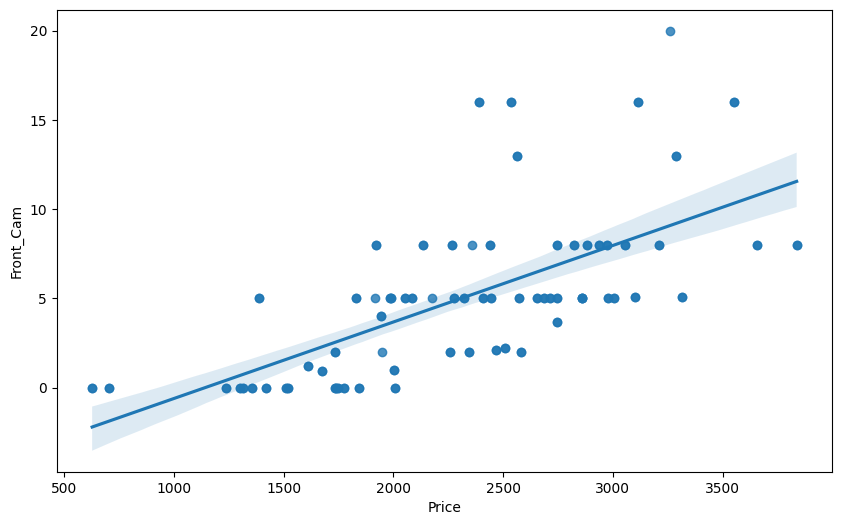

In [21]:
plt.figure(figsize=(10,6))
sns.regplot(x = df['Price'], y = df['Front_Cam'])
plt.show() 
# there is a linear positive relationship between price and front cam

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

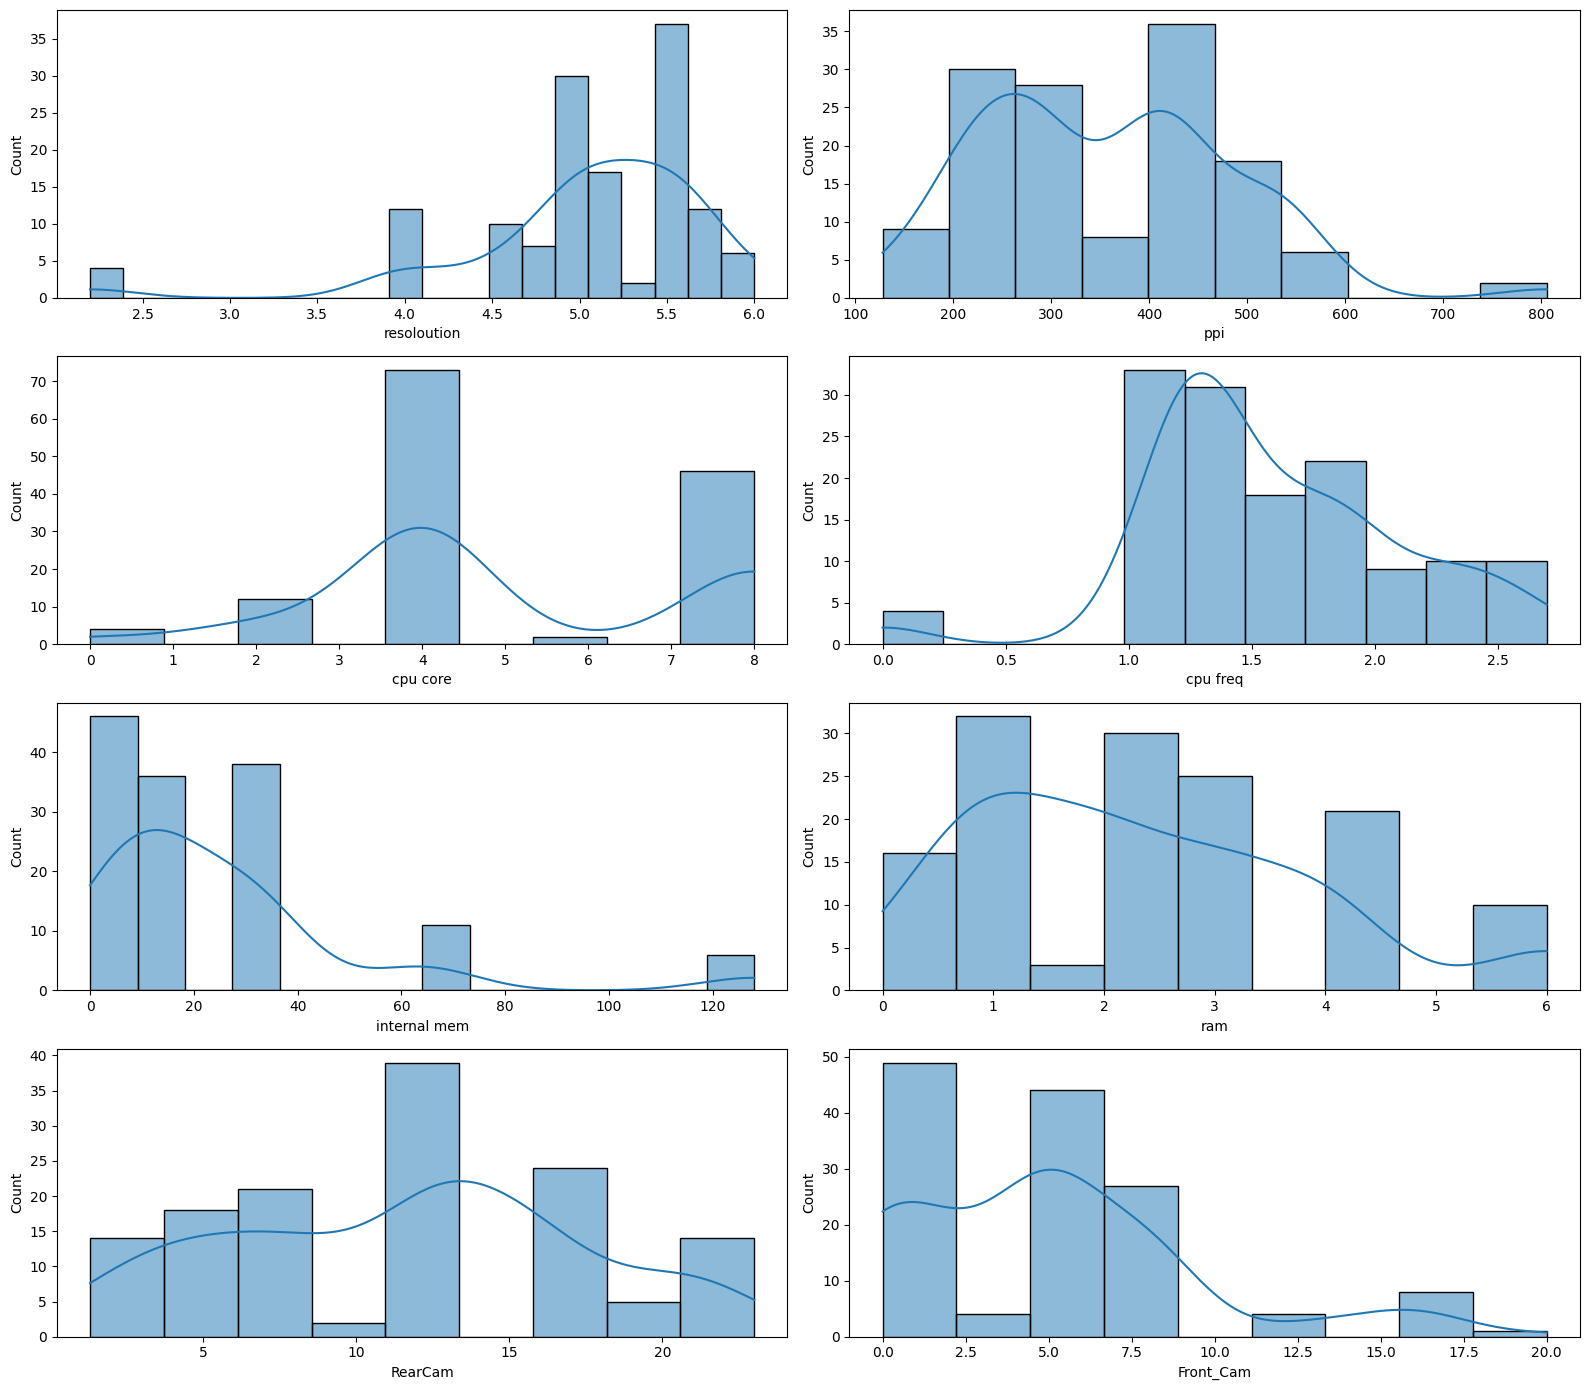

In [22]:
cols = ['resoloution','ppi',	'cpu core',	'cpu freq',	'internal mem'	,'ram'	,'RearCam',	'Front_Cam']
fig,axes=plt.subplots(figsize=(16,14),nrows=4,ncols=2)

axes = axes.flatten()

for i in range(8):
    sns.histplot(df,x=df[cols[i]],ax=axes[i],kde=True)
    #axes[i].set_ylabel('Price')
    axes[i].set_xlabel(f"{cols[i]}")
plt.tight_layout()
plt.show()

In [23]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler() 
cols_to_n = ['Price', 'weight', 'resoloution', 'ppi', 'cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam', 'battery', 'thickness']
df[cols_to_n] = sc.fit_transform(df[cols_to_n])

In [24]:
df.head()

,Price,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,0.538797,0.361905,0.789474,0.436578,1.00,0.500000,0.12500,0.500000,0.539171,0.40,0.417073,0.171642
1,0.349330,0.266667,0.473684,0.154867,0.25,0.481481,0.03125,0.166667,0.085253,0.00,0.195122,0.358209
2,0.401371,0.123810,0.657895,0.271386,0.50,0.444444,0.06250,0.250000,0.539171,0.25,0.268293,0.186567
3,0.214085,0.204762,0.473684,0.154867,0.25,0.481481,0.03125,0.085333,0.085253,0.00,0.121951,0.440299
4,0.349330,0.266667,0.473684,0.154867,0.25,0.481481,0.03125,0.166667,0.085253,0.00,0.195122,0.358209


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score 

In [26]:
X = df.drop('Price' , axis=1)
Y = df['Price']

In [27]:
x_train , x_test , y_train , y_test = train_test_split(X , Y , random_state=42 , test_size=0.3)

In [28]:
lr = LinearRegression()

In [29]:
lr.fit(x_train , y_train)

LinearRegression()

In [30]:
y_pred = lr.predict(x_test)

In [31]:
r2 = r2_score(y_test , y_pred)

In [32]:
r2*100

90.52263237948664

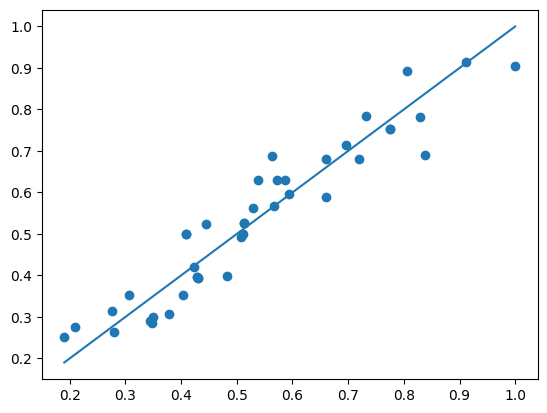

In [33]:
plt.scatter(y_test , y_pred)
plt.plot([min(y_test), max(y_test)],[min(y_test), max(y_test)])
plt.show()